In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
import scipy.linalg as linalg

# Exercice 1. (Compression JPEG).

## Charger l'image

In [4]:
u = plt.imread('sujet_TP6\Boats.bmp')

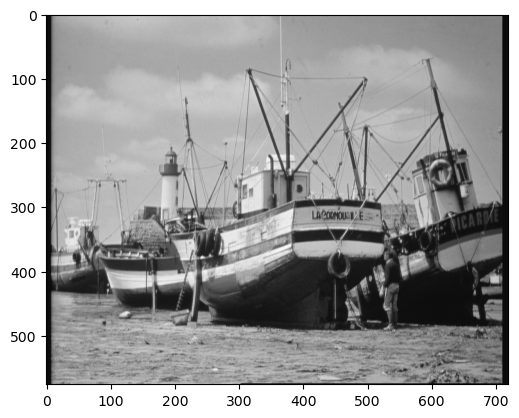

In [9]:
plt.imshow(u, cmap = "gray");

In [258]:
def compress(u, alpha = 0.5):
    M, N = u.shape
    û = fft2(u)
    û_abs = np.abs(û)
    tau = int(M * N * alpha)
    seuil = û_abs.flatten()
    seuil = np.sort(seuil)[::-1][tau]
    û_abs[û_abs <= seuil] = 0.0
    û[û_abs==0]=0
    return np.abs(ifft2(û))

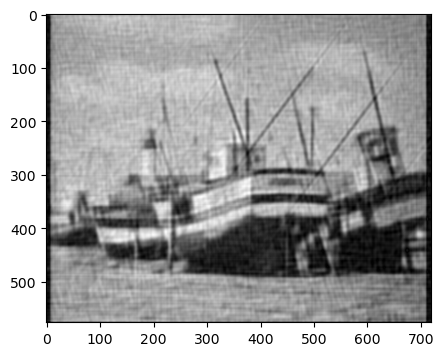

In [304]:
v = compress(u, alpha = 0.01)
plt.figure(figsize = (7,4))
plt.imshow(v, cmap = "gray");

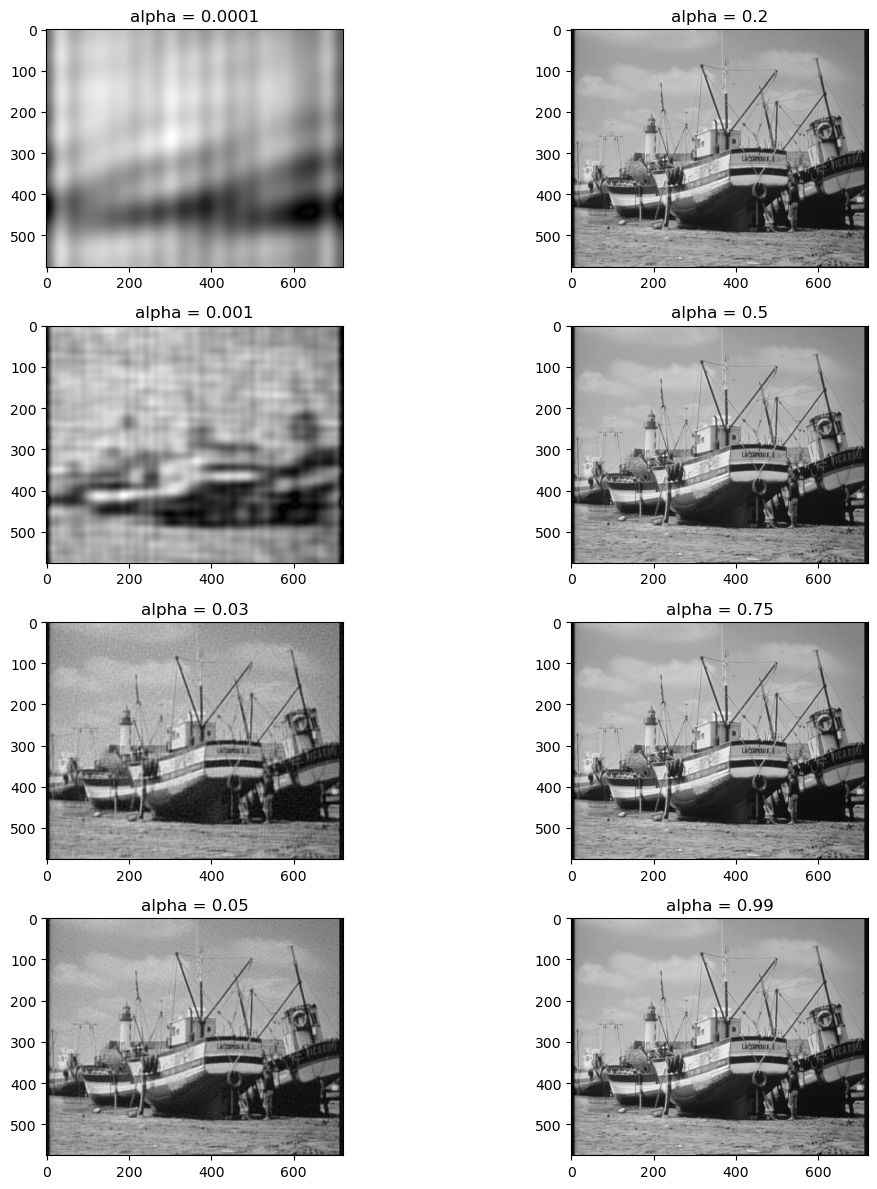

In [288]:
alpha_val = [0.0001, 0.001, 0.03, 0.05, 0.2, 0.5, 0.75, 0.99]

fig, axes = plt.subplots(4,2, figsize = (12,12))

for i, (alpha1, alpha2) in enumerate (zip(alpha_val[:4], alpha_val[4:])):
    axes[i, 0].imshow(compress(u, alpha1), cmap ='gray')
    axes[i, 0].set_title(f"alpha = {alpha1}")
    axes[i, 1].imshow(compress(u, alpha2), cmap ='gray')
    axes[i, 1].set_title(f"alpha = {alpha2}")

plt.tight_layout()
plt.show()

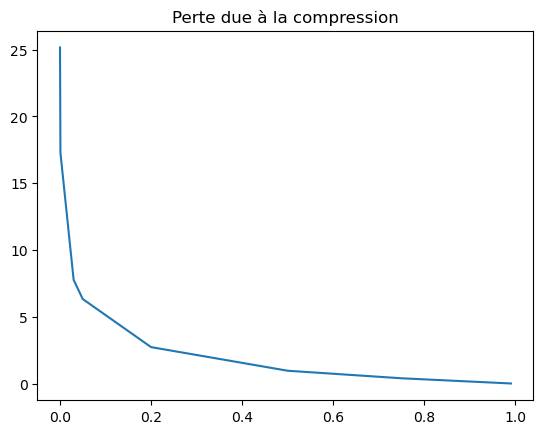

In [314]:
alpha_val = [0.0001, 0.001, 0.03, 0.05, 0.2, 0.5, 0.75, 0.99]

norm = []

for alpha in (alpha_val):
    norm_alpha = np.linalg.norm(u - compress(u, alpha))/np.linalg.norm(u)
    norm.append(norm_alpha*100)
    
plt.plot(alpha_val, norm)
plt.title('Perte due à la compression')
plt.show()